# Statistical Modelling with Airbnb Europe Dataset

The below prepares the dataset's variables for inclusion in the regression model trials.  A backward stepwise selection approach was taken, removing each variable upon examination of model results and the p-values for each variable's coefficient.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

Airbnb_data_encoded_V3.csv is the result of the 2_Encodeing.ipynb file.  A number of operations were carried out on an earlier version of the dataset to produce this, these actions mainly being get_dummies performed on various columns.  We'll start from here as the work can't be verified from the beginning.  In all likelihood the data is good for modelling purposes below.

In [3]:
Airbnb_data = pd.read_csv('Airbnb_data_encoded_V3.csv')

In [4]:
pd.set_option('display.max_columns', None)
Airbnb_data

,Price,Entire home/apt,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend
0,194.033698,True,False,True,2.0,False,1,0,100.0,93.0,10.0,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,1,0,0,0,0,0,0,0,0,1,0
1,344.245776,True,False,True,4.0,False,0,0,75.0,85.0,10.0,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,1,0,0,0,0,0,0,0,0,1,0
2,264.101422,True,False,True,2.0,False,0,1,87.5,87.0,10.0,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,1,0,0,0,0,0,0,0,0,1,0
3,433.529398,True,False,True,4.0,False,0,1,87.5,90.0,20.0,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,1,0,0,0,0,0,0,0,0,1,0
4,485.552926,True,False,True,2.0,True,0,0,100.0,98.0,10.0,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,715.938574,True,False,False,6.0,False,0,1,100.0,100.0,30.0,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,0,0,0,0,0,0,0,0,1,0,1
41710,304.793960,True,False,False,2.0,False,0,0,75.0,86.0,10.0,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,0,0,0,0,0,0,0,0,1,0,1
41711,637.168969,True,False,False,2.0,False,0,0,100.0,93.0,10.0,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,0,0,0,0,0,0,0,0,1,0,1
41712,301.054157,True,False,True,2.0,False,0,0,100.0,87.0,10.0,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,0,0,0,0,0,0,0,0,1,0,1


In [5]:
Airbnb_data.dtypes

Price                          float64
Entire home/apt                   bool
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                       float64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
City_Amsterdam                   int64
City_Athens                      int64
City_Barcelona                   int64
City_Berlin                      int64
City_Budapest                    int64
City_Lisbon                      int64
City_Paris                       int64
City_Rome                        int64
City_Vienna              

Person Capacity could perhaps be cast to integer, just to be consistent.

In [6]:
Airbnb_data['Person Capacity'].unique()

array([2., 4., 3., 6., 5.])

In [7]:
Airbnb_data['Person Capacity'] = Airbnb_data['Person Capacity'].astype(int)

We could cast the Multiple Rooms and Business columns to boolean to be consistent with the prior boolean columns (e.g. Shared Room, Superhost, etc), but apparently it's not necessary for using statsmodels OLS.  They can be left as integers (0/1 in this case).

In [8]:
Airbnb_data['Multiple Rooms'].unique()

array([1, 0], dtype=int64)

In [9]:
Airbnb_data['Business'].unique()

array([0, 1], dtype=int64)

Just confirming the data types again before proceeding.

In [10]:
Airbnb_data.dtypes

Price                          float64
Entire home/apt                   bool
Shared Room                       bool
Private Room                      bool
Person Capacity                  int32
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                       float64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
City_Amsterdam                   int64
City_Athens                      int64
City_Barcelona                   int64
City_Berlin                      int64
City_Budapest                    int64
City_Lisbon                      int64
City_Paris                       int64
City_Rome                        int64
City_Vienna              

The get_dummies below doens't really change anything as the City and Weekday columns had already been encoded for the CSV's export (i.e. the file that was imported in this notebook).  You can see that from the dataframe reprinted below.  It also doens't impact data type.

That said, drop_first=True doesn't seem to have been set when City and Weekday were encoded in the 2_Encodeing.ipynb.  There's a bit of debate as to whether that's necessary, but more often than not the debate leans towards "yes, or suffer the effects of multicollinearity".  So the City_Amsterdam and Weekday_Weekday columns will be dropped from the X set in the modelling trials below.

In [11]:
Airbnb_data = pd.get_dummies(Airbnb_data)

In [12]:
pd.set_option('display.max_columns', None)
Airbnb_data

,Price,Entire home/apt,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend
0,194.033698,True,False,True,2,False,1,0,100.0,93.0,10.0,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,1,0,0,0,0,0,0,0,0,1,0
1,344.245776,True,False,True,4,False,0,0,75.0,85.0,10.0,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,1,0,0,0,0,0,0,0,0,1,0
2,264.101422,True,False,True,2,False,0,1,87.5,87.0,10.0,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,1,0,0,0,0,0,0,0,0,1,0
3,433.529398,True,False,True,4,False,0,1,87.5,90.0,20.0,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,1,0,0,0,0,0,0,0,0,1,0
4,485.552926,True,False,True,2,True,0,0,100.0,98.0,10.0,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,715.938574,True,False,False,6,False,0,1,100.0,100.0,30.0,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,0,0,0,0,0,0,0,0,1,0,1
41710,304.793960,True,False,False,2,False,0,0,75.0,86.0,10.0,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,0,0,0,0,0,0,0,0,1,0,1
41711,637.168969,True,False,False,2,False,0,0,100.0,93.0,10.0,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,0,0,0,0,0,0,0,0,1,0,1
41712,301.054157,True,False,True,2,False,0,0,100.0,87.0,10.0,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,0,0,0,0,0,0,0,0,1,0,1


In the first model trial below nearly all variables will be included with certain exceptions:  
* The non-normalized indices, in favour of using the normalized indices.
* One encoded City column (as discussed above)
* One encoded Weekday column (as discussed above)
* (more... read below)  

Before proceeding with a modelling exercise, it helps to review a correlation heatmap to spot highly collinear input variables.

One such example is the (normalized) attraction index and the (normalized) restaurant index.  These are quite correlated at 0.7; it would be wise to choose one or the other.  

In the interest of expediency (unforeseen circumstances in project development), the normalized attraction index will be kept while the normalized restaurant index will be dropped, as the former has a slightly higher correlation to price, and would therefore suggest a stronger relationship to price.  

Early predictions, if relying on the correlation heatmap, would suggest that there is nearly no correlation between price and the following variables:
* Shared Room
* Superhost
* Multiple Rooms
* Business
* Cleanliness Rating (nearly zero)
* Guest Satisfaction
* Distance to city center
* Distance to metro
* A number of the encoded cities
* Weekday

A weak correlation between price and the following variables exist:
* Private Room
* Person Capacity
* Bedrooms
* Normalized Attraction and Normalized Restaurant indices
* Encoded Amsterdam, Athens, Paris and Rome (interestingly some are negative)

One might have expected a strong negative correlation between Shared Room and Private Room, similar to what's seen for Weekend/Weekday.  If one imagines a room can either be private or shared but not both, they should be opposites of each other, but as well over half the listings are "Entire home/apt" where both Private Room and Shared Room are set to 0 or false, the two don't always move together.  This is observed in Tableau visualizations.

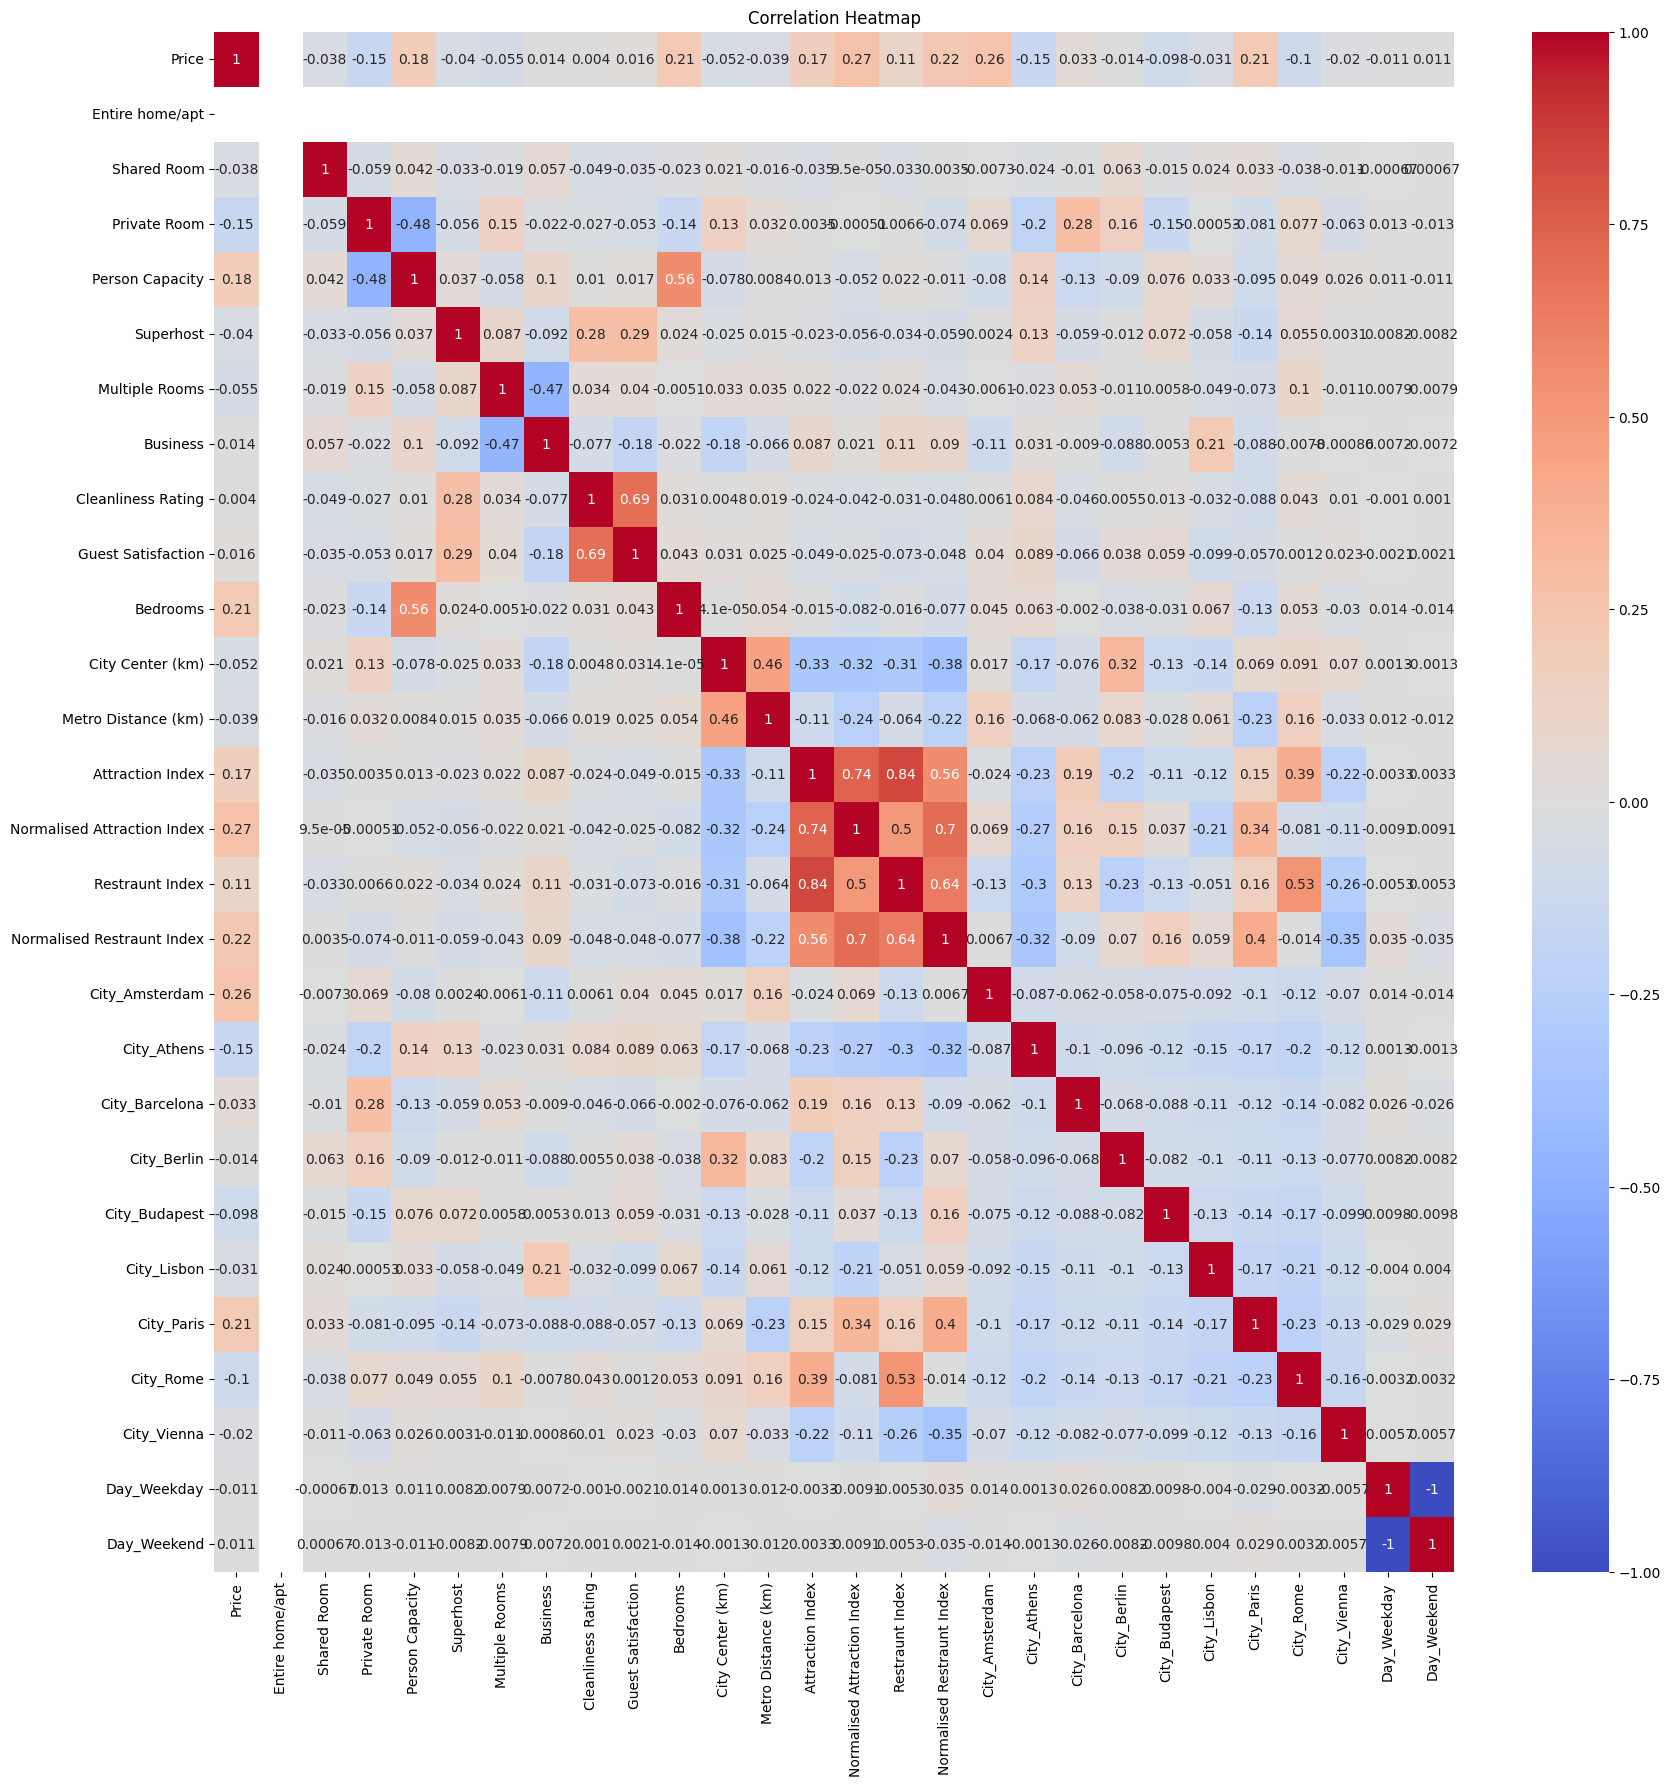

In [13]:
# Using a heatmap to observe the correlations between various data points.
corr_matrix = Airbnb_data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap below filters out correlations below 0.25 to reduce the visual clutter.

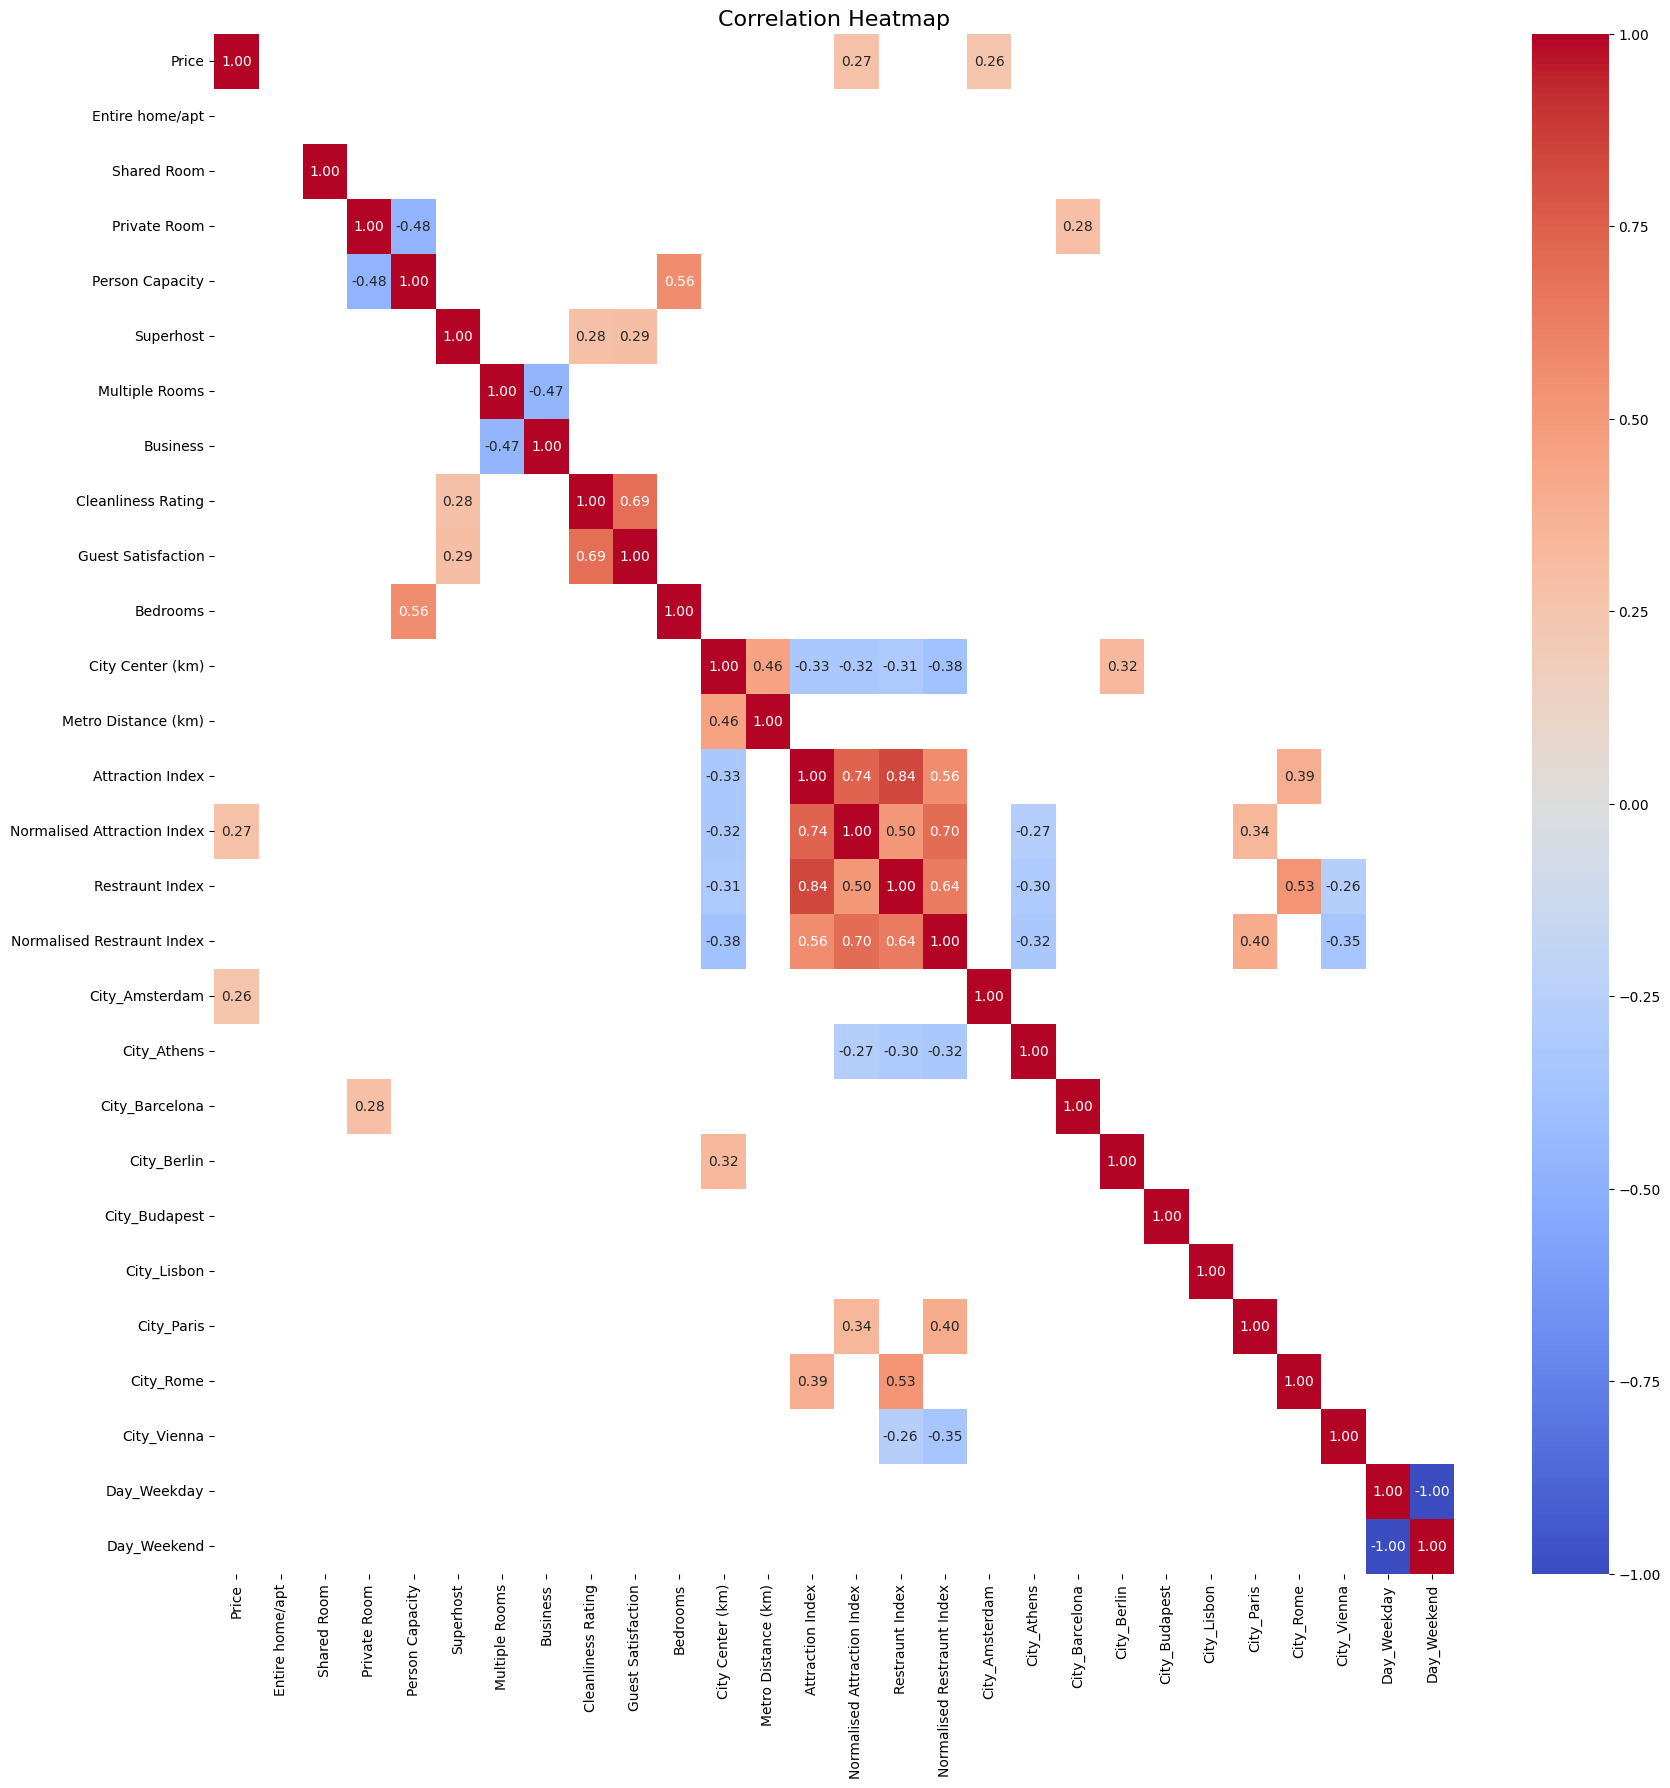

In [ ]:
corr_matrix = Airbnb_data.corr()

threshold = 0.25

mask = np.abs(corr_matrix) < threshold

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Not certain why the chosen variables were cast to integer (from boolean) below, but as they're 1/0, the risk of harm is small.  Leaving it in.

In [17]:
y = Airbnb_data['Price']

# Set the other columns as the independent variables, excluding 'City' and 'Room type'
X = Airbnb_data[['Entire home/apt',
                 'Shared Room',                     
                 'Private Room',                     
                 'Person Capacity',               
                 'Superhost',                         
                 'Multiple Rooms',                  
                 'Business',                         
                 'Cleanliness Rating',            
                 'Guest Satisfaction',            
                 'Bedrooms',                       
                 'City Center (km)',              
                 'Metro Distance (km)',            
                 #'Attraction Index',              # dropping in favour of the normalized index 
                 'Normalised Attraction Index',    
                 #'Restraunt Index',               # dropping in favour of the normalized index 
                 #'Normalised Restraunt Index',    # Normalized Attraction and Norm. Restaurant are strongly correlated.  Dropping this one. 
                 #'City_Amsterdam',                # similar to doing drop_first=True (hopefully... seems like the same thing)  
                 'City_Athens',                     
                 'City_Barcelona',                  
                 'City_Berlin',                     
                 'City_Budapest',                    
                 'City_Lisbon',                     
                 'City_Paris',                      
                 'City_Rome',                        
                 'City_Vienna',                      
                 #'Day_Weekday',                   # similar to doing drop_first=True (hopefully... seems like the same thing) 
                 'Day_Weekend']]

X[['Entire home/apt', 'Shared Room', 'Private Room', 'Superhost']] = X[['Entire home/apt', 'Shared Room', 'Private Room', 'Superhost']].astype(int)

# Add a column of 1's to include an intercept in the model
X = sm.add_constant(X)

# Instantiate and fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     695.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:21:38   Log-Likelihood:            -2.8789e+05
No. Observations:               41714   AIC:                         5.758e+05
Df Residuals:                   41692   BIC:                         5.760e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Entire home/apt   

C:\Users\ron_d\AppData\Local\Temp\ipykernel_6704\2086741070.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Entire home/apt', 'Shared Room', 'Private Room', 'Superhost']] = X[['Entire home/apt', 'Shared Room', 'Private Room', 'Superhost']].astype(int)


### Model Iteration

From here on in, variables whose coefficients have p-values greater than 0.05 will be excluded, starting with the variable with the largest p-value, and modelling will continue without that variable.

Judging by the p-values given in the model results above, Metro Distance does not have a significant coefficient in this model.  It is dropped below.

In [18]:
y = Airbnb_data['Price']

# Set the other columns as the independent variables, excluding 'City' and 'Room type'
X = Airbnb_data[['Entire home/apt',
                 'Shared Room',                     
                 'Private Room',                     
                 'Person Capacity',               
                 'Superhost',                         
                 'Multiple Rooms',                  
                 'Business',                         
                 'Cleanliness Rating',            
                 'Guest Satisfaction',            
                 'Bedrooms',                       
                 'City Center (km)',              
                 #'Metro Distance (km)',            
                 #'Attraction Index',               
                 'Normalised Attraction Index',    
                 #'Restraunt Index',                
                 #'Normalised Restraunt Index',     
                 #'City_Amsterdam',                  
                 'City_Athens',                     
                 'City_Barcelona',                  
                 'City_Berlin',                     
                 'City_Budapest',                    
                 'City_Lisbon',                     
                 'City_Paris',                      
                 'City_Rome',                        
                 'City_Vienna',                      
                 #'Day_Weekday',
                 'Day_Weekend']]

X[['Entire home/apt', 'Shared Room', 'Private Room','Superhost']] = X[['Entire home/apt', 'Shared Room', 'Private Room','Superhost']].astype(int)

# Add a column of 1's to include an intercept in the model
X = sm.add_constant(X)

# Instantiate and fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     729.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:22:02   Log-Likelihood:            -2.8789e+05
No. Observations:               41714   AIC:                         5.758e+05
Df Residuals:                   41693   BIC:                         5.760e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Entire home/apt   

C:\Users\ron_d\AppData\Local\Temp\ipykernel_6704\4280546199.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Entire home/apt', 'Shared Room', 'Private Room','Superhost']] = X[['Entire home/apt', 'Shared Room', 'Private Room','Superhost']].astype(int)


The variable with the highest p-value for its coefficient is now Superhost.  It is dropped below.

In [19]:
y = Airbnb_data['Price']

# Set the other columns as the independent variables, excluding 'City' and 'Room type'
X = Airbnb_data[['Entire home/apt',
                 'Shared Room',                     
                 'Private Room',                     
                 'Person Capacity',               
                 #'Superhost',                         
                 'Multiple Rooms',                  
                 'Business',                         
                 'Cleanliness Rating',            
                 'Guest Satisfaction',            
                 'Bedrooms',                       
                 'City Center (km)',              
                 #'Metro Distance (km)',            
                 #'Attraction Index',               
                 'Normalised Attraction Index',    
                 #'Restraunt Index',                
                 #'Normalised Restraunt Index',     
                 #'City_Amsterdam',                  
                 'City_Athens',                     
                 'City_Barcelona',                  
                 'City_Berlin',                     
                 'City_Budapest',                    
                 'City_Lisbon',                     
                 'City_Paris',                      
                 'City_Rome',                        
                 'City_Vienna',                      
                 #'Day_Weekday',
                 'Day_Weekend']]

X[['Entire home/apt', 'Shared Room', 'Private Room']] = X[['Entire home/apt', 'Shared Room', 'Private Room']].astype(int)

# Add a column of 1's to include an intercept in the model
X = sm.add_constant(X)

# Instantiate and fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     768.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:24:18   Log-Likelihood:            -2.8789e+05
No. Observations:               41714   AIC:                         5.758e+05
Df Residuals:                   41694   BIC:                         5.760e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Entire home/apt   

C:\Users\ron_d\AppData\Local\Temp\ipykernel_6704\3884848103.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Entire home/apt', 'Shared Room', 'Private Room']] = X[['Entire home/apt', 'Shared Room', 'Private Room']].astype(int)


The variable with the highest p-value for its coefficient is now City Center.  It is dropped below.

In [20]:
y = Airbnb_data['Price']

# Set the other columns as the independent variables, excluding 'City' and 'Room type'
X = Airbnb_data[['Entire home/apt',
                 'Shared Room',                     
                 'Private Room',                     
                 'Person Capacity',               
                 #'Superhost',                         
                 'Multiple Rooms',                  
                 'Business',                         
                 'Cleanliness Rating',            
                 'Guest Satisfaction',            
                 'Bedrooms',                       
                 #'City Center (km)',              
                 #'Metro Distance (km)',            
                 #'Attraction Index',               
                 'Normalised Attraction Index',    
                 #'Restraunt Index',                
                 #'Normalised Restraunt Index',     
                 #'City_Amsterdam',                  
                 'City_Athens',                     
                 'City_Barcelona',                  
                 'City_Berlin',                     
                 'City_Budapest',                    
                 'City_Lisbon',                     
                 'City_Paris',                      
                 'City_Rome',                        
                 'City_Vienna',                      
                 #'Day_Weekday',
                 'Day_Weekend']]

X[['Entire home/apt', 'Shared Room', 'Private Room']] = X[['Entire home/apt', 'Shared Room', 'Private Room']].astype(int)

# Add a column of 1's to include an intercept in the model
X = sm.add_constant(X)

# Instantiate and fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     810.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:26:45   Log-Likelihood:            -2.8789e+05
No. Observations:               41714   AIC:                         5.758e+05
Df Residuals:                   41695   BIC:                         5.760e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Entire home/apt   

C:\Users\ron_d\AppData\Local\Temp\ipykernel_6704\3151745735.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Entire home/apt', 'Shared Room', 'Private Room']] = X[['Entire home/apt', 'Shared Room', 'Private Room']].astype(int)


At this point, all variable coefficient p-values are below 0.05 (chosen threshold by general convention).  The adjusted R2 is poor at 0.259.  This means the y-predictor (the regression model's output) still has a fair deal of squared error associated with it, and therefore only reduces the sum of squared error by a fraction of 0.259 of the squared error using mean y alone.  

With this said, it may make more sense to predict price per city, as opposed to trying to predict a price over all cities.  There were some differences in price spread between one city and another, and they may each have their quirks with regards to influences on pricing.  For example some may see more business traffic while others might have more tourism.  If there were data tracking the sort of clients booking and their purpose in that city, this might yield some insights.

In all likelihood there are inputs that may be more informative than those used in the above trials, and there may be a need to consider nonlinear effects, or some sort of clustering.  These would be good paths to investigate in future work.  

Some potential future inputs and input combinations are explored in the Tableau workbook.  This can help inform improvements.

For curiosity's sake, all cities were dropped below.  Adjusted R2 dropped further.  Definitely more front-end work required to tailor the inputs and investigate other modelling frameworks.

In [ ]:
y = Airbnb_data['Price']

# Set the other columns as the independent variables, excluding 'City' and 'Room type'
X = Airbnb_data[['Entire home/apt',
                 'Shared Room',                     
                 'Private Room',                     
                 'Person Capacity',               
                 #'Superhost',                         
                 'Multiple Rooms',                  
                 'Business',                         
                 'Cleanliness Rating',            
                 'Guest Satisfaction',            
                 'Bedrooms',                       
                 #'City Center (km)',              
                 #'Metro Distance (km)',            
                 #'Attraction Index',               
                 'Normalised Attraction Index',    
                 #'Restraunt Index',                
                 #'Normalised Restraunt Index',     
                 #'City_Amsterdam',                  
                 #'City_Athens',                     
                 #'City_Barcelona',                  
                 #'City_Berlin',                     
                 #'City_Budapest',                    
                 #'City_Lisbon',                     
                 #'City_Paris',                      
                 #'City_Rome',                        
                 #'City_Vienna',                      
                 #'Day_Weekday',
                 'Day_Weekend']]

X[['Entire home/apt', 'Shared Room', 'Private Room']] = X[['Entire home/apt', 'Shared Room', 'Private Room']].astype(int)

# Add a column of 1's to include an intercept in the model
X = sm.add_constant(X)

# Instantiate and fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     700.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:59:27   Log-Likelihood:            -2.9091e+05
No. Observations:               41714   AIC:                         5.819e+05
Df Residuals:                   41703   BIC:                         5.819e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Entire home/apt   

C:\Users\ron_d\AppData\Local\Temp\ipykernel_6704\2359732935.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Entire home/apt', 'Shared Room', 'Private Room']] = X[['Entire home/apt', 'Shared Room', 'Private Room']].astype(int)
